In [261]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import matplotlib.animation as animation

import pandas as pd
from datetime import date
from datetime import timedelta 

data_table = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

## Most recent map

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


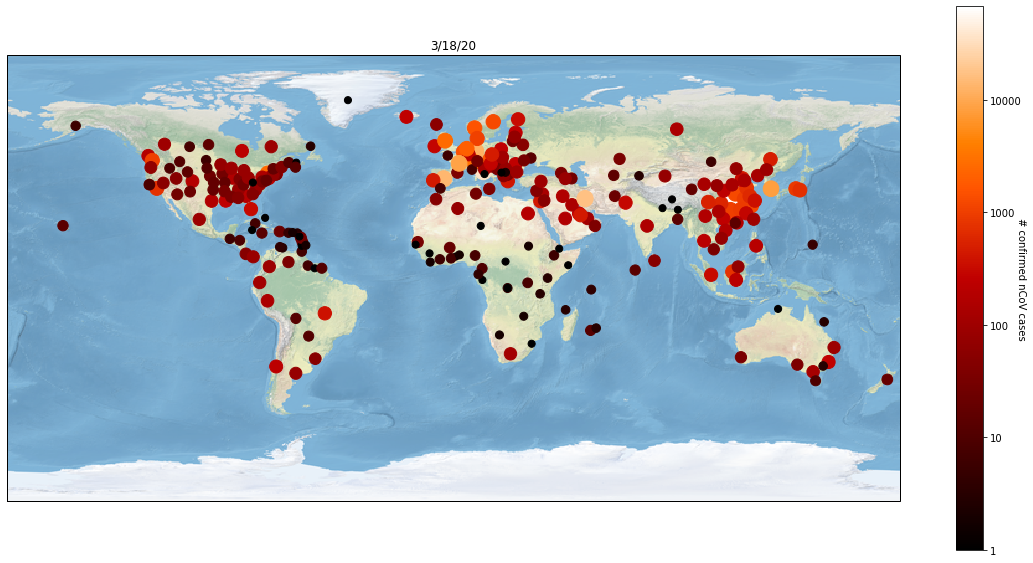

In [261]:
plt.figure(figsize=(20,20))
yesterday = date.strftime(date.today()-timedelta(days=1),"%m/%d/%y")
yesterday = yesterday.lstrip('0').replace('/0','/')
ax = plt.axes(projection=ccrs.PlateCarree())
crv_map = ax.scatter(data_table.get('Long').tolist(),data_table.get('Lat').tolist(),s=(np.log10(data_table.get(yesterday).tolist())+1)*50, c=np.log10(data_table.get(yesterday).tolist()),cmap='gist_heat')
plt.title(yesterday)
cbar = plt.colorbar(crv_map, shrink=0.5)
cbar.ax.set_yticklabels(['1','10','100','1000','10000'])
cbar.set_label('# confirmed nCoV cases', rotation=270)
ax.stock_img()
plt.savefig('coronamap.png', orientation = 'landscape')
plt.show()

## Animation

In [14]:
def get_data(table,title):
    data = pd.DataFrame(data_table[title]).astype(float)
    data.columns = {title}
    return data

In [353]:
d = get_data(data_table,title)
lat = data_table['Lat']
long = data_table['Long']
days = data_table.columns[4:]
daily_cases = pd.DataFrame(data=d)
coordinates = pd.DataFrame(data = [lat,lon]).transpose()
merged = pd.concat((coordinates,daily_cases), axis=1)


In [181]:
Writer = animation.ImageMagickFileWriter
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

Text(0.5, 1.0, '1/22/20')

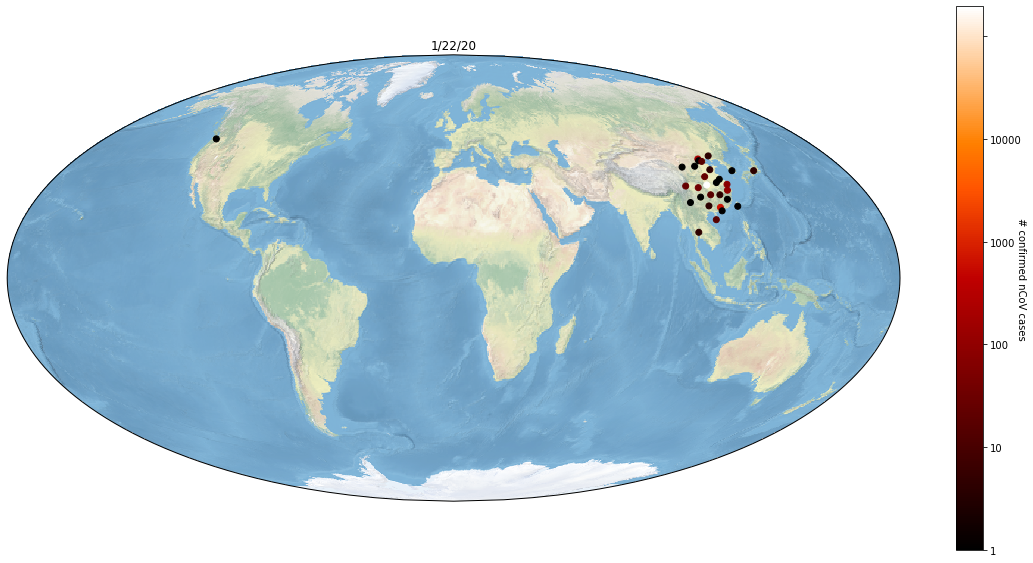

In [256]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
base_data = plt.scatter(long, lat,c = np.log10(data_table[days[0]]), cmap='gist_heat', transform=ccrs.PlateCarree())
cbar = plt.colorbar(mappable=base_data, shrink=0.5)
cbar.set_label('# confirmed nCoV cases', rotation=270)
cbar.ax.set_yticklabels(['1','10','100','1000','10000'])
ax.set_title(days[0])

In [257]:
def animate(i):
    data = data_table[days[i+1]] #select data range
    crv_map = ax.scatter(long,lat,s=(np.log10(data)+1)*50, c=np.log10(data),cmap='gist_heat', transform=ccrs.PlateCarree())
    ax.set_title(days[i+1])

In [258]:
ani = animation.FuncAnimation(fig, animate, frames=days.shape[0]-2, repeat=True)

In [259]:
ani.save('coronavirus.gif')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


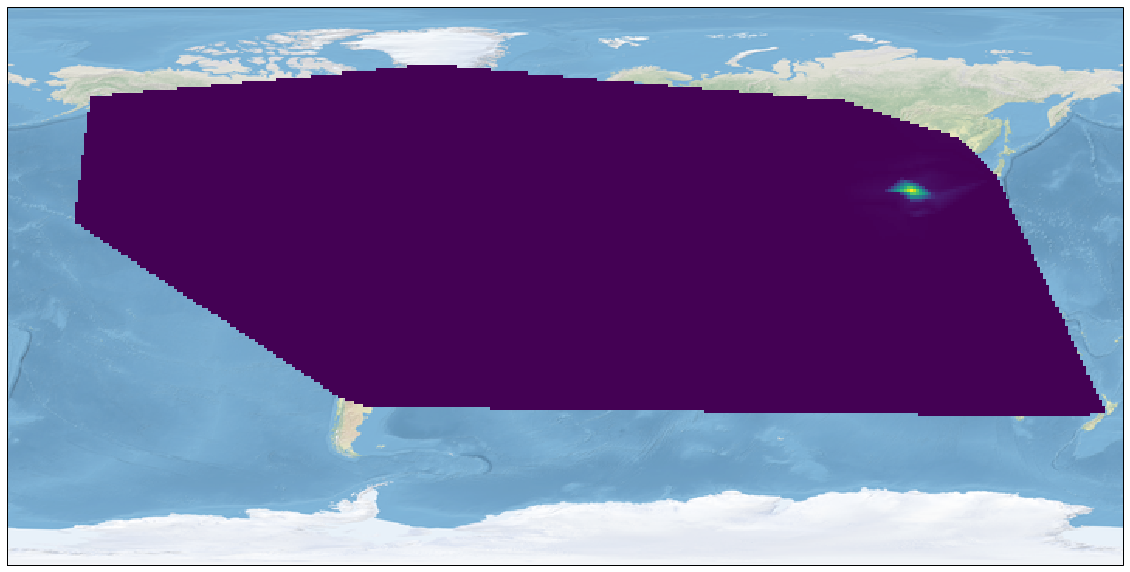

In [398]:
import scipy
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
coord_mesh_x, coord_mesh_y = np.meshgrid(np.arange(180,-179,-1),np.arange(90,-90,-1))
data_interp = scipy.interpolate.griddata((long, lat),data_table[days[10]],(coord_mesh_x,coord_mesh_y), rescale=True)
ax.pcolormesh(coord_mesh_x, coord_mesh_y,data_interp, transform=ccrs.PlateCarree())

## By Region

In [264]:
regional_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv')

In [289]:
regionalized = regional_data.groupby('WHO region').sum()
days2 = regionalized.columns[:-4]

Text(0.5, 0, '# Confirmed Coronavirus Cases')

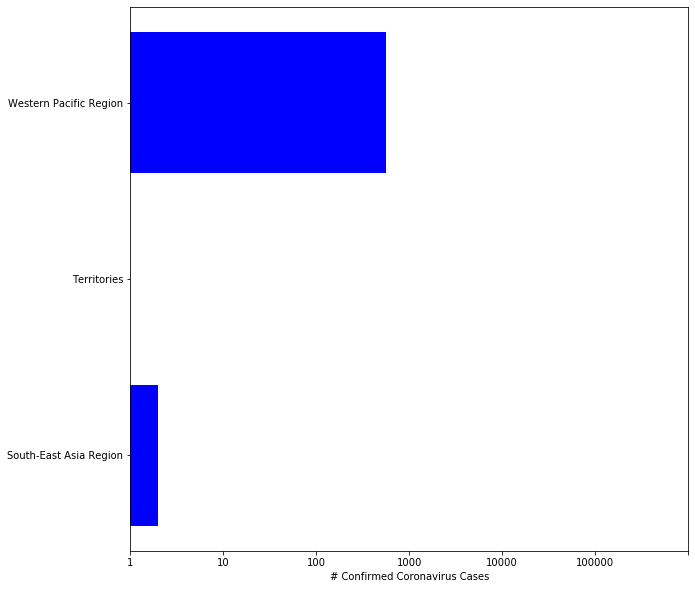

In [347]:
[fig2, ax] = plt.subplots(figsize=(10,10))
ax.barh(regionalized.index,np.log10(regionalized[days2[0]]),color='b')
ax.set_xlim([0,6])
ax.set_xticklabels(['1','10','100','1000','10000','100000'])
ax.set_xlabel('# Confirmed Coronavirus Cases')

In [348]:
def animate2(i):
    barplot = ax.barh(regionalized.index,np.log10(regionalized[days2[i+1]]),color='b')
    ax.set_title(days[i])

In [349]:
ani2 = animation.FuncAnimation(fig2, animate2, frames=days2.shape[0]-1, repeat=True)

In [350]:
ani2.save('coronavirus_regional.gif')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
